### A. Data Generation

In [10]:
import numpy as np

# some parameters
p = 500
n = int(3e3) #3e6
rho = 1
max_iter = 500
tol = 5e-3

X = np.random.normal(0, 1, size=(n,p))

y = []
for i in range(n):
    noise = np.random.normal(0, 0.5)
    element = -2*X[i][99] -2*X[i][199] + 2*X[i][299] + 2*X[i][399] - 2*X[i][499] + noise
    y.append([element])

y = np.array(y)

# 產生 beta_true
beta_true = []
positive_elements = np.full((100), 2, dtype=int).tolist()
negative_elements = np.full((100), -2, dtype=int).tolist()

beta_true.extend(negative_elements)
beta_true.extend(negative_elements)
beta_true.extend(positive_elements)
beta_true.extend(positive_elements)
beta_true.extend(negative_elements)
# print(beta_true)

beta_r = beta_true
# 產生 theta
theta_r = np.random.normal(size=(p,1))
# 產生 alpha
alpha_r = np.zeros(shape=(p,1))


[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [12]:
import pywt
import numpy.linalg

def lasso_estimation(X, y, theta_r, lamb_da):
    first_term = 0.5 * np.linalg.norm(np.dot(X, theta_r) - y, ord=2)**2
    second_term = lamb_da*np.linalg.norm(theta_r, ord=1)
    return first_term + second_term

def ADMM_of_lasso(X, y, lamb_da, rho, n, p, theta_r, beta_r, alpha_r):
    primal_residual_array = []
    dual_residual_array = []

    val = lasso_estimation(X, y, theta_r, lamb_da)

    for iteration in range(max_iter):
        if (iteration%100==0):
            print(f'Iterations: {iteration}')

        # Computing theta_r
        first_term = np.linalg.inv(np.dot(np.transpose(X),X) + rho+np.identity(p))
        second_term = np.dot(np.transpose(X),y) + rho*(beta_r - alpha_r)
        theta_r = np.dot(first_term, second_term)

        # Computing beta_r
        beta_r_old = beta_r
        summation = theta_r + alpha_r
        beta_r = pywt.threshold(summation, lamb_da/rho, "soft")

        primal_residual = np.linalg.norm(np.dot(np.identity(p), theta_r) - np.dot(np.identity(p), beta_r), ord=2)
        dual_residual = np.linalg.norm(-rho*(beta_r-beta_r_old), ord=2)
        primal_residual_array.append(primal_residual)
        dual_residual_array.append(dual_residual)
        alpha_r = alpha_r + theta_r - beta_r
        val = lasso_estimation(X, y, theta_r, lamb_da)

    val = lasso_estimation(X, y, theta_r, lamb_da)
    primal_residual = np.linalg.norm(np.dot(np.identity(p), theta_r) - np.dot(np.identity(p), beta_r), ord=2)
    dual_res = np.linalg.norm(rho*(-1)*(beta_r - beta_r_old), ord=2)
    primal_residual_array.append(primal_residual)
    dual_residual_array.append(dual_residual)

    return primal_residual_array, dual_residual_array, beta_r


In [13]:
selected_lamb_da = [0.01, 0.05, 0.1, 0.5]
primal_residual_array = []
dual_residual_array = []
beta_lasso_array = []

for i in range(len(selected_lamb_da)):
    primal_residual, dual_residual, beta_r = ADMM_of_lasso(X, y, selected_lamb_da[i], rho,
                                                           n, p, theta_r, beta_r, alpha_r)
    primal_residual_array.append(primal_residual)
    dual_residual_array.append(dual_residual)
    beta_lasso_array.append(beta_r)

ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400


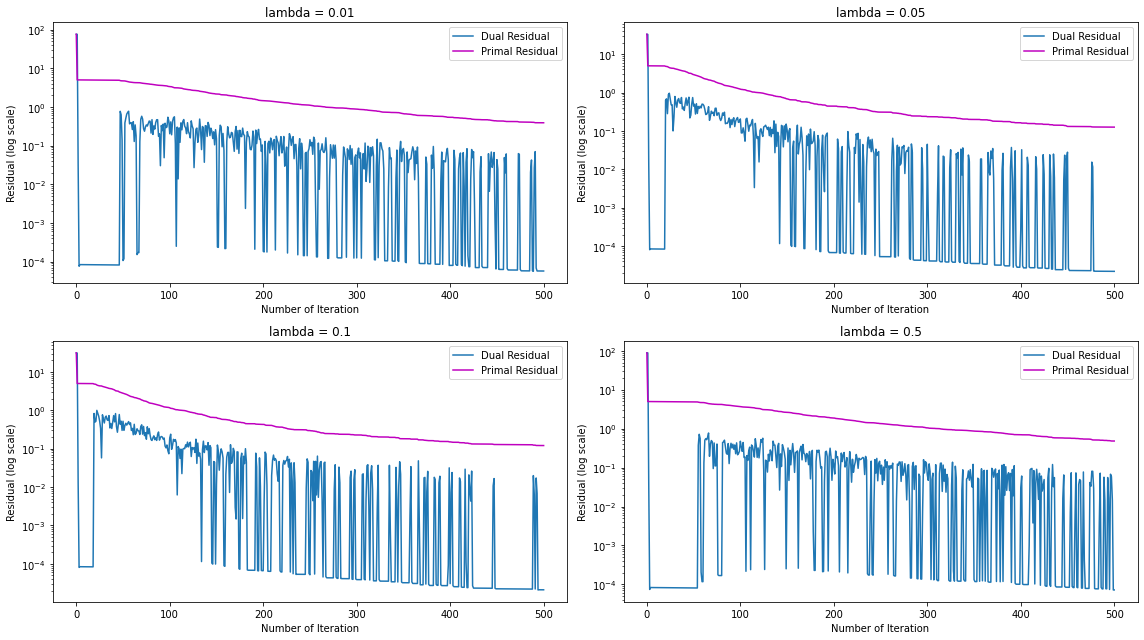

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,9))

for index in range(len(selected_lamb_da)):
    plt.subplot(2, 2, index+1)
    plt.plot(dual_residual_array[index], label = "Dual Residual")
    plt.plot(primal_residual_array[index], color = 'm', label = "Primal Residual")
    plt.legend()

    plt.title("lambda = " + str(selected_lamb_da[index]))
    plt.xlabel("Number of Iteration")
    plt.ylabel("Residual (log scale)")
    plt.yscale("log")

plt.tight_layout()
plt.show()

In [28]:
selected_lambda = np.random.uniform(low = 0.001, high = 5, size = (20,))

In [29]:
primal_residual_array = []
dual_residual_array = []
beta_lasso_array = []

for index in range(len(selected_lambda)):
    primal_residual, dual_residual, beta_r = ADMM_of_lasso(X, y, selected_lambda[index],
                                                           rho, n, p,
                                                           theta_r, beta_r, alpha_r)
    primal_residual_array.append(primal_residual)
    dual_residual_array.append(dual_residual)
    beta_lasso_array.append(beta_r)

ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
ITerations: 400
ITerations: 0
ITerations: 100
ITerations: 200
ITerations: 300
IT

In [45]:
beta_lasso_array = np.array(beta_lasso_array)
# print(beta_lasso_array.shape)

(20, 500, 500)


(20, 500)

In [46]:
# lasso_array = np.reshape(beta_lasso_array, (len(selected_lambda), p))
lasso_array = beta_lasso_array[:,:,0]

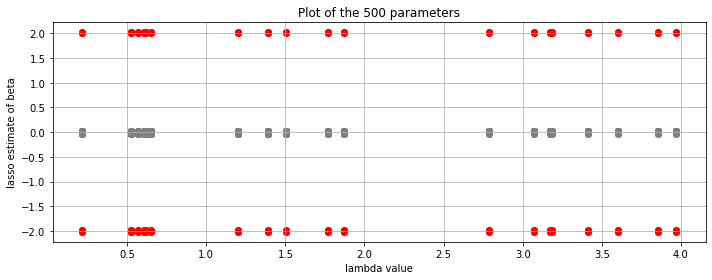

In [58]:
plt.figure(figsize = (10,4))

for index in range(len(selected_lambda)):
    plt.scatter([selected_lambda[index]]*p, lasso_array[index], color='grey')
    indices = [100, 200, 300, 400, 500]
    for j in range(len(indices)):
        plt.scatter([selected_lambda[index]], lasso_array[index][indices[j]-1], color = 'red')

plt.title("Plot of the 500 parameters")
plt.xlabel("lambda value")
plt.ylabel("lasso estimate of beta")

plt.grid()
plt.tight_layout()
plt.show()